In [1]:
# Imports
import numpy as np
import pandas as pd
import pytz
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd
from datetime import datetime, timedelta
from dateutil.parser import parse

In [2]:
# Exploring python 'datetime.datetime()' and 'datetime.timedelta()' functions
now = datetime.now()
print(now)
print(now.year, now.month, now.day, '\n')

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days, delta.seconds, '\n')

start = datetime(2011, 1, 7)
print(start)
print(start + timedelta(12))     # add 12 days to 'start' (year, month, day)
print(start - 2 * timedelta(12)) # subtract 24 days from start

2019-12-19 11:00:45.784041
2019 12 19 

926 days, 15:45:00
926 56700 

2011-01-07 00:00:00
2011-01-19 00:00:00
2010-12-14 00:00:00


<center>'datetime' types</center>

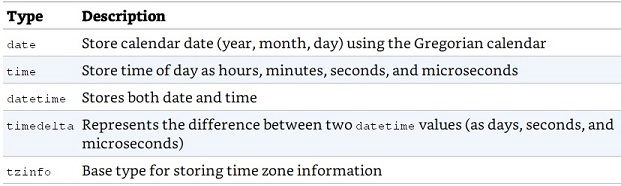

In [3]:
# Conversions
stamp = datetime(2011, 1, 3)            # Create a 'datetime' object
print(str(stamp))                       # Convert to a string
print(stamp.strftime('%Y-%m-%d')) # Convert to a formatted string

2011-01-03 00:00:00
2011-01-03


<center></center>

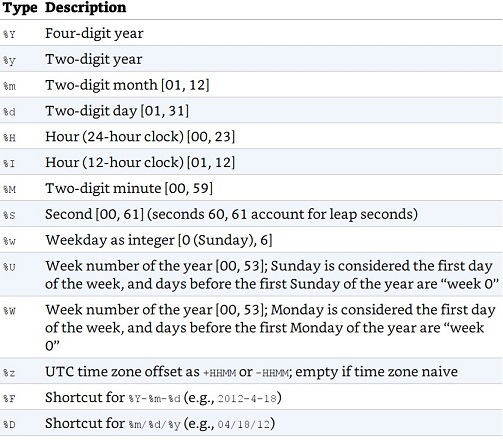

In [4]:
# Convert strings to dates with known format using 'datetime.strptime()'
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))
datestrs = ['7/6/2011', '8/6/2011'] 
print([datetime.strptime(x, '%m/%d/%Y') for x in datestrs], '\n')

# Convert strings to dates using most human-readable dates
print(parse('2011-01-03'))
print(parse('Jan 31, 1997 10:45 PM'))
print(parse('6/12/2011', dayfirst = True), '\n') #Parse international standards

# Parsing arrays of dates using '.to_datetime()'
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
print(pd.to_datetime(datestrs), '\n')
idx = pd.to_datetime(datestrs + [None]) # Deal with missing data
print(idx, '\n')  # NOTE: NaT = Not a Time
print(idx[2])
print(pd.isnull(idx)) # create boolean array to find missing data

2011-01-03 00:00:00
[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)] 

2011-01-03 00:00:00
1997-01-31 22:45:00
2011-12-06 00:00:00 

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None) 

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None) 

NaT
[False False  True]


<center>Locale Date Formatting</center>

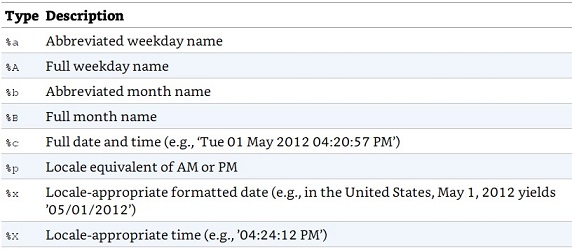

In [5]:
# Time Series Basics
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), 
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

# Create pandas Series object indexed by timestamps
ts = pd.Series(np.random.randn(6), index = dates)
print(ts, '\n')
print(ts.index, '\n') # ts.index is a 'DateTimeIndex' object
# Can perform arithmetic operations. ts[::2] selects every 2nd element in 'ts'
print(ts + ts[::2], '\n') 
print(ts.index.dtype) # Timestamps have nanosecond resolution

stamp = ts.index[0] # each index value is a 'Timestamp' object
stamp               # 'Timestamp' and 'datetime' objects are interchangeable

2011-01-02   -1.696008
2011-01-05    2.878106
2011-01-07    0.316202
2011-01-08   -0.572398
2011-01-10    0.572709
2011-01-12   -0.092746
dtype: float64 

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None) 

2011-01-02   -3.392016
2011-01-05         NaN
2011-01-07    0.632404
2011-01-08         NaN
2011-01-10    1.145419
2011-01-12         NaN
dtype: float64 

datetime64[ns]


Timestamp('2011-01-02 00:00:00')

In [6]:
# Indexing, Selecting and Subsetting Time Series objects
stamp = ts.index[2] # index as you would any Series object
print(ts[stamp])

print(ts['1/10/2011']) # If index exists, can use a string to index a Series
print(ts['20110110'], '\n')

longer_ts = pd.Series(np.random.randn(1000), 
                      index = pd.date_range('1/1/2000', periods = 1000))
print(longer_ts.head(), 'Length: ', len(longer_ts), '\n')
print(longer_ts['2001'].head(), '\n')    # Slice by year '2001'
print(longer_ts['2001-05'].head(), '\n') # Slice by year and month '2001-05'

print(ts[datetime(2011, 1, 7):])    # Slice using 'datetime()' object

0.3162019267521083
0.572709308467886
0.572709308467886 

2000-01-01    1.905113
2000-01-02    0.467689
2000-01-03   -0.602274
2000-01-04    0.129376
2000-01-05   -0.798246
Freq: D, dtype: float64 Length:  1000 

2001-01-01    0.543732
2001-01-02    1.787535
2001-01-03    1.814758
2001-01-04    0.104040
2001-01-05   -0.919535
Freq: D, dtype: float64 

2001-05-01   -0.283397
2001-05-02    0.316433
2001-05-03   -0.047337
2001-05-04   -1.204278
2001-05-05   -0.579323
Freq: D, dtype: float64 

2011-01-07    0.316202
2011-01-08   -0.572398
2011-01-10    0.572709
2011-01-12   -0.092746
dtype: float64


In [7]:
print(ts, '\n')
print(ts['1/6/2011':'1/11/2011'], '\n') # Use slicing to do a range query
print(ts.truncate(after = '1/9/2011'), '\n') # can also use truncate() to slice

# Slicing works on DataFrames
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index = dates,
                       columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
print(long_df.loc['5-2001'], '\n')

# Handling duplicate Indicies
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index = dates)
print(dup_ts, '\n')
print(dup_ts.index.is_unique, '\n') # Check if all indexes are unique
print(dup_ts['1/3/2000'], '\n') # Returns a value since index is unique
print(dup_ts['1/2/2000'], '\n') # Returns a slice since index is duplicated

grouped = dup_ts.groupby(level = 0) # aggregate duplicated timestamps
print(grouped.mean(), '\n') # and perform arithmetic operations on the group
print(grouped.count())

2011-01-02   -1.696008
2011-01-05    2.878106
2011-01-07    0.316202
2011-01-08   -0.572398
2011-01-10    0.572709
2011-01-12   -0.092746
dtype: float64 

2011-01-07    0.316202
2011-01-08   -0.572398
2011-01-10    0.572709
dtype: float64 

2011-01-02   -1.696008
2011-01-05    2.878106
2011-01-07    0.316202
2011-01-08   -0.572398
dtype: float64 

            Colorado     Texas  New York      Ohio
2001-05-02 -1.695790 -0.426662  2.635165 -0.353943
2001-05-09 -0.573515  0.915324  1.093759  0.086419
2001-05-16 -2.310983 -0.730405 -2.464080  0.233047
2001-05-23  1.214353  1.310765 -0.616927  2.259537
2001-05-30 -0.567979 -1.669402  0.868140 -0.392824 

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32 

False 

4 

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32 

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32 

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64


In [8]:
# Date Ranges and Frequencies
# Convert a time series to a fixed daily frequency using '.resample()'
resampler = ts.resample('D') # 'D' = Daily frequency

# Generating date ranges using 'pandas.date_range()'
index = pd.date_range('2012-04-01', '2012-06-01') # Daily Timestamps
print(index, '\n')

# Generate date range by specify start or end and number of timestamps to make
print(pd.date_range(start = '2012-04-01', periods = 20), '\n')
print(pd.date_range(end = '2012-06-01', periods = 20), '\n')
# Change 'freg=' for a date range containing last business day or each month
print(pd.date_range('2000-01-01', '2000-12-01', freq = 'BM'), '\n')

# '.date_range' saves and duplicates the time on all date range timestamps
print(pd.date_range('2012-05-02 12:56:31', periods = 5), '\n')
# You can normalize the time on timestamps to midnight using 'normalize'
print(pd.date_range('2012-05-02 12:56:31', periods = 5, normalize = True))

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

<center>Time Series Frequencies</center>

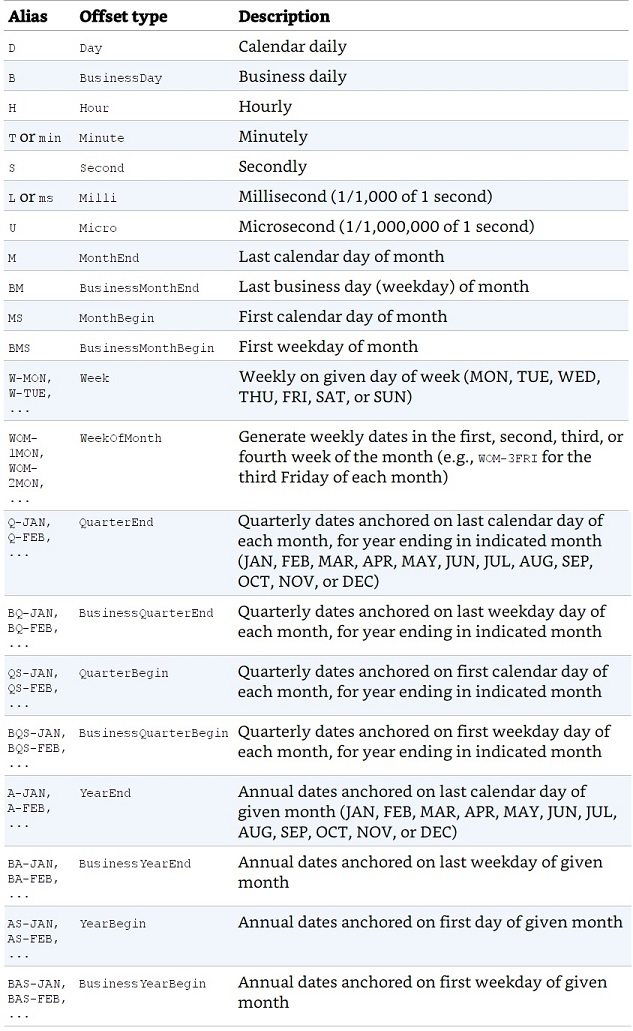

In [9]:
# Frequencies 
hour = Hour()  # Hour() = Hour class = Hour Base Frequency
four_hours = Hour(4) # Multiple of Hour Base Frequency
print(four_hours)
# '4h' = 4 * base frequency where 'h' = Hour
print(pd.date_range('2000-01-01', '2000-01-03 23:59', freq = '4h'), '\n') 

print(Hour(2) + Minute(30)) # combine base freq offsets. Converted to minutes
# freq = '1h30min' is parsed and combined into 1 hour 30 min frequency periods
print(pd.date_range('2000-01-01', periods = 10, freq = '1h30min'))

# WOM - Week Of Month frequence class: 'WOM-3FRI' = 3rd Friday of every month
rng = pd.date_range('2012-01-01', '2012-09-01', freq = 'WOM-3FRI')
list(rng)

<4 * Hours>
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H') 

<150 * Minutes>
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')


[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [10]:
# Shifting Data forward or backward in time
ts = pd.Series(np.random.randn(4), # freg = 'M' means last day of each month
               index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))
print(ts, '\n')
print(ts.shift(2), '\n')  # Move data two periods later filling in with 'NaN's
print(ts.shift(-2), '\n') # Move time data two periods eariler. Data is lost
print(ts.shift(2, freq = 'M'), '\n') # Advanced timestamps then move data
print(ts.shift(3, freq = 'D'), '\n') # Move data to 3rd day of each month
print(ts.shift(1, freq = '90T')) # Move dat 90min later. '90T' = 90 minutes

ts / ts.shift(1) - 1 # Use shift() to ompute percent change in time

2000-01-31    0.007337
2000-02-29   -1.139368
2000-03-31   -0.296157
2000-04-30   -0.589491
Freq: M, dtype: float64 

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.007337
2000-04-30   -1.139368
Freq: M, dtype: float64 

2000-01-31   -0.296157
2000-02-29   -0.589491
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64 

2000-03-31    0.007337
2000-04-30   -1.139368
2000-05-31   -0.296157
2000-06-30   -0.589491
Freq: M, dtype: float64 

2000-02-03    0.007337
2000-03-03   -1.139368
2000-04-03   -0.296157
2000-05-03   -0.589491
dtype: float64 

2000-01-31 01:30:00    0.007337
2000-02-29 01:30:00   -1.139368
2000-03-31 01:30:00   -0.296157
2000-04-30 01:30:00   -0.589491
Freq: M, dtype: float64


2000-01-31           NaN
2000-02-29   -156.293017
2000-03-31     -0.740069
2000-04-30      0.990465
Freq: M, dtype: float64

In [11]:
# Using Offsets - Used with 'datetime' or 'Timestamp' objects
now = datetime(2011, 11, 17)
print(type(now + 2 * Day()), now + 2 * Day()) # use 2 * 'Day()' offset
# Use 'MonthEnd()' anchor to add offset result in last day of the month
print(now + MonthEnd())
offset = MonthEnd()
print(offset.rollforward(now)) # Same result with rollforward Monthend() anchor
print(offset.rollback(now), '\n') # rollback() gives last day of previous month

# Use offsets with 'groupby()'
ts = pd.Series(np.random.randn(20), 
               index = pd.date_range('1/15/2000', periods = 20, freq = '4d'))
print(ts.head(), '\n') # Only show first 5 rows
# Add offset and perform arithmetic operations such as mean
print(ts.groupby(offset.rollforward).mean(), '\n') 
print(ts.resample('M').mean()) # Can use '.resample()' to achieve same result

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2011-11-19 00:00:00
2011-11-30 00:00:00
2011-11-30 00:00:00
2011-10-31 00:00:00 

2000-01-15   -0.357532
2000-01-19   -0.133879
2000-01-23   -1.712538
2000-01-27   -0.468438
2000-01-31    1.990487
Freq: 4D, dtype: float64 

2000-01-31   -0.136380
2000-02-29    0.350154
2000-03-31   -0.726719
dtype: float64 

2000-01-31   -0.136380
2000-02-29    0.350154
2000-03-31   -0.726719
Freq: M, dtype: float64


In [12]:
# Timezones using pytz library: UTC = coordinated Universal Time
print(pytz.common_timezones[-5:], '\n')
tz = pytz.timezone('America/New_York') # Get a time zone object
tz

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC'] 



<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [13]:
# Localization and Conversion
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print(ts.index.tz, '\n') # timezone naive since no timezone('tz') is available
ts_utc = ts.tz_localize('UTC') # Add timezone info with '.tz_localize()'
print(ts_utc)
print(ts_utc.index.tz, '\n') # timezone info is now available
# use '.tz_convert()' to convert to a different timezone
print('America/New_York Timezone')
print(ts_utc.tz_convert('America/New_York'), '\n')

# Remove Daylight Savings Time (DST) issues by localizing first then convert
ts_eastern = ts.tz_localize('America/New_York')
print('UTC Timezone')
print(ts_eastern.tz_convert('UTC'), '\n') # Convert to 'UTZ' timezone
print('Europe/Berlin Timezone')
print(ts_eastern.tz_convert('Europe/Berlin'), '\n') # 'Europe/Berlin' timezone

# You can generate Date Range with a time zone
print(pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC'), '\n')

# Note: 'tz_localize()' and 'tz_convert()' are 'DatetimeIndex' methods
ts.index.tz_localize('Asia/Shanghai')

2012-03-09 09:30:00   -0.588799
2012-03-10 09:30:00   -1.403979
2012-03-11 09:30:00   -0.956031
2012-03-12 09:30:00   -1.308510
2012-03-13 09:30:00    0.203296
2012-03-14 09:30:00    0.010437
Freq: D, dtype: float64
None 

2012-03-09 09:30:00+00:00   -0.588799
2012-03-10 09:30:00+00:00   -1.403979
2012-03-11 09:30:00+00:00   -0.956031
2012-03-12 09:30:00+00:00   -1.308510
2012-03-13 09:30:00+00:00    0.203296
2012-03-14 09:30:00+00:00    0.010437
Freq: D, dtype: float64
UTC 

America/New_York Timezone
2012-03-09 04:30:00-05:00   -0.588799
2012-03-10 04:30:00-05:00   -1.403979
2012-03-11 05:30:00-04:00   -0.956031
2012-03-12 05:30:00-04:00   -1.308510
2012-03-13 05:30:00-04:00    0.203296
2012-03-14 05:30:00-04:00    0.010437
Freq: D, dtype: float64 

UTC Timezone
2012-03-09 14:30:00+00:00   -0.588799
2012-03-10 14:30:00+00:00   -1.403979
2012-03-11 13:30:00+00:00   -0.956031
2012-03-12 13:30:00+00:00   -1.308510
2012-03-13 13:30:00+00:00    0.203296
2012-03-14 13:30:00+00:00    0.01043

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [14]:
# Aware Timestamp objects
stamp = pd.Timestamp('2011-03-12 04:00') 
print(stamp.tz)                          # timestamp Naive
stamp_utc = stamp.tz_localize('utc')     
print(stamp_utc.tz)                      # timestamp aware
stamp_ny = stamp_utc.tz_convert('America/New_York')
print(stamp_ny.tz)
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
print(stamp_moscow.tz, '\n')     # Time Zone supplied when creating 'Timestamp'

print(stamp_utc.value) # Timestamps are based on Unix epoch (1/1/1970)
print(stamp_utc.tz_convert('America/New_York').value, '\n') # cannot be changed

# Timestamp operations observe daylight savings time (DST)
stamp = pd.Timestamp('2012-03-11 01:30', tz = 'US/Eastern')
print(stamp)
print(stamp + Hour(), '\n') # Crossed DST boundary and added another hour

stamp = pd.Timestamp('2012-11-04 00:30', tz = 'US/Eastern')
print()
print(stamp)
print(stamp + 2 * Hour()) # also crossed a DST boundary but subtracted an hour

None
UTC
America/New_York
Europe/Moscow 

1299902400000000000
1299902400000000000 

2012-03-11 01:30:00-05:00
2012-03-11 03:30:00-04:00 


2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00


In [15]:
# Performing operations between Time Zones
rng = pd.date_range('3/7/2012 9:30', periods = 10, freq = 'B') # Business Day
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts, '\n')

ts1 = ts[:7].tz_localize('Europe/London') # Assign 1st 7 to 'Europe/London' tz
# Convert last 5 of 'ts1' to 'Europe/Moscow' tz and assign to 'ts2'
ts2 = ts1[2:].tz_convert('Europe/Moscow')
print(ts1.index, '\n')
print(ts2.index, '\n')
result = ts1 + ts2  # Combine 'ts1' and 'ts2' with an arithmetic operation
print(result.index) # Operation automatically converts to UTC tz
result

2012-03-07 09:30:00    0.833910
2012-03-08 09:30:00   -1.224621
2012-03-09 09:30:00   -0.277972
2012-03-12 09:30:00   -0.089105
2012-03-13 09:30:00   -1.456809
2012-03-14 09:30:00   -0.677210
2012-03-15 09:30:00   -0.996916
2012-03-16 09:30:00   -1.466003
2012-03-19 09:30:00   -2.008746
2012-03-20 09:30:00   -0.536242
Freq: B, dtype: float64 

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='B') 

DatetimeIndex(['2012-03-09 13:30:00+04:00', '2012-03-12 13:30:00+04:00',
               '2012-03-13 13:30:00+04:00', '2012-03-14 13:30:00+04:00',
               '2012-03-15 13:30:00+04:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='B') 

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:0

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -0.555944
2012-03-12 09:30:00+00:00   -0.178210
2012-03-13 09:30:00+00:00   -2.913618
2012-03-14 09:30:00+00:00   -1.354421
2012-03-15 09:30:00+00:00   -1.993833
Freq: B, dtype: float64